In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# create normal distribution with defined mean and standard deviation
def normal_distribution(mean, std, size):
    return np.random.normal(mean, std, size)

# create weibull distribution with defined shape and scale
def weibull_distribution(shape, Lambda, size):
    return np.random.weibull(shape, size) * Lambda
    


In [22]:
nStations = 300000

# sum of two populations has to be equal to nStations
narrival1 = round(0.79 * nStations)
narrival2 = round(0.21 * nStations)
ndeparture1 = round(0.32 * nStations)
ndeparture2 = round(0.68 * nStations)

# if sum of two populations is not equal to nStations, fill the gap with one of the populations
while (narrival1 + narrival2) != nStations:
    if (narrival1 + narrival2) < nStations:
        # randomly choose one of the two populations
        if np.random.randint(0, 2) == 0:
            narrival1 += 1
        else:
            narrival2 += 1
    else:
        # randomly choose one of the two populations
        if np.random.randint(0, 2) == 0:
            narrival1 -= 1
        else:
            narrival2 -= 1

while (ndeparture1 + ndeparture2) != nStations:
    # randomly choose one of the two populations
    if (ndeparture1 + ndeparture2) < nStations:
        if np.random.randint(0, 2) == 0:
            ndeparture1 += 1
        else:
            ndeparture2 += 1    
    else:
        if np.random.randint(0, 2) == 0:
            ndeparture1 -= 1
        else:
            ndeparture2 -= 1

# define normal distribution parameters for arrival distribution
mean_arrival1 = 9 + 15/60
std_arrival1 = 1 + 30/60
mean_arrival2 = 14 + 45/60
std_arrival2 = 1 + 15/60

# define weibull distribution parameters for departure distribution
Lambda_departure1 = 12 + 15/60
shape_departure1 = 14 + 45/60
Lambda_departure2 = 17 + 45/60
shape_departure2 = 15 + 15/60

# create arrival normal distribution as sum of two normals
normal_arrival1 = normal_distribution(mean=mean_arrival1, std=std_arrival1, size=narrival1)
normal_arrival2 = normal_distribution(mean=mean_arrival2, std=std_arrival2, size=narrival2)


# create weibull distributions
weibull_departure1 = weibull_distribution(Lambda=Lambda_departure1, shape=shape_departure1, size=ndeparture1)
weibull_departure2 = weibull_distribution(Lambda=Lambda_departure2, shape=shape_departure2, size=ndeparture2)

In [23]:

# create arrival distribution by concatenating the two normals
arrival_distribution =  np.concatenate((normal_arrival1, normal_arrival2))

# create departure distribution by concatenating the two weibulls
departure_distribution = np.concatenate((weibull_departure1, weibull_departure2))

In [24]:
# fit the distributions with kernel density estimation
arrival_distribution_kde = scipy.stats.gaussian_kde(arrival_distribution)
departure_distribution_kde = scipy.stats.gaussian_kde(departure_distribution)


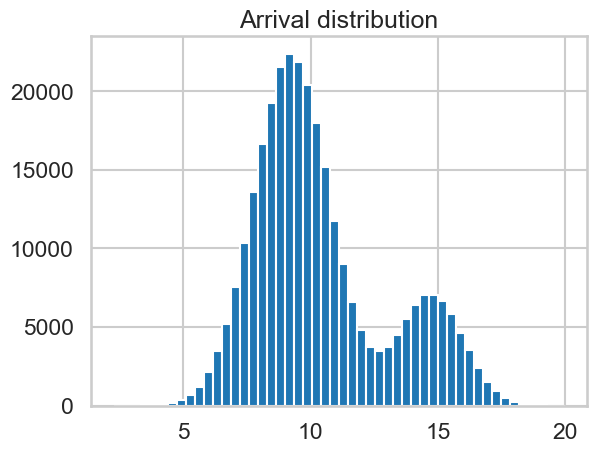

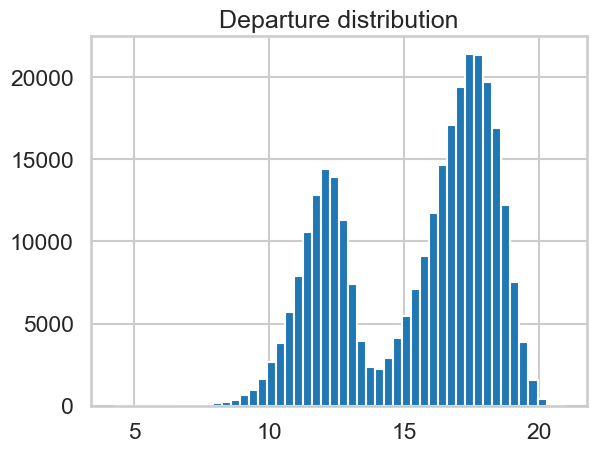

In [25]:
# plot arrival distribution
plt.hist(arrival_distribution, bins=50)
plt.title("Arrival distribution")
plt.show()

# plot departure distribution
plt.hist(departure_distribution, bins=50)
plt.title("Departure distribution")
plt.show()


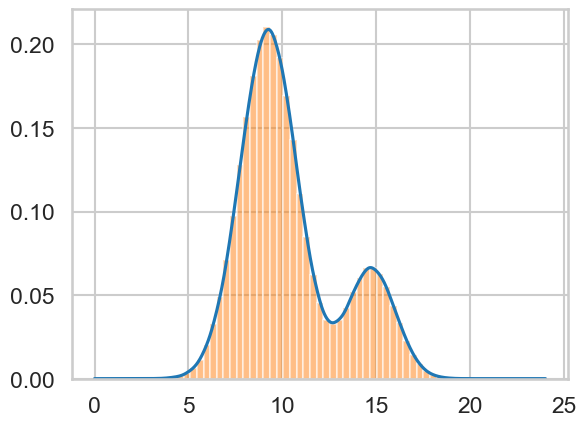

In [27]:
#  visualize the distributions
sns.set_style("whitegrid")
sns.set_context("talk")

# create a grid of 1000 points between 0 and 24 hours
x = np.linspace(0, 24, 1000)

# plot the arrival distribution kde on top of the histogram 
plt.plot(x, arrival_distribution_kde(x), label="Arrival distribution")
_ = plt.hist(arrival_distribution, bins=50, density=True, alpha=0.5)

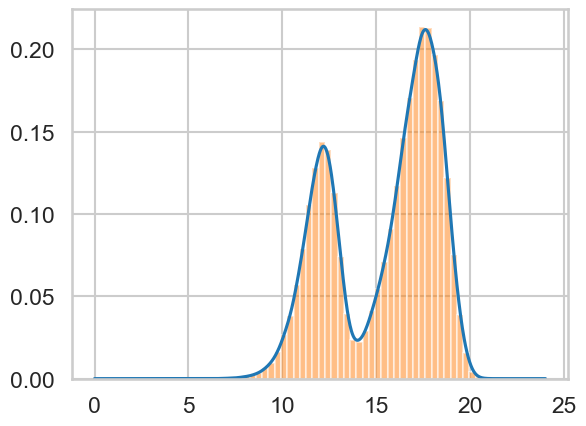

In [28]:
# plot the departure distribution kde on top of the histogram
plt.plot(x, departure_distribution_kde(x), label="Departure distribution")
_ = plt.hist(departure_distribution, bins=50, density=True, alpha=0.5)

In [29]:
#  draw samples from the arrival distribution
arrival_samples = arrival_distribution_kde.resample(300)

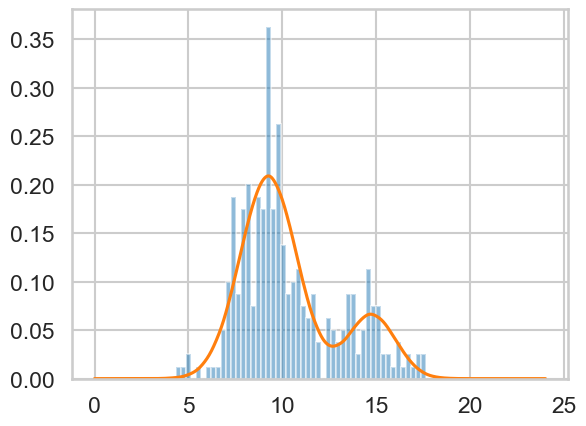

In [41]:
# plot the arrival_samples hist on top of the arrival distribution kde
plt.hist(arrival_samples[0], bins=50, density=True, alpha=0.5)
plt.plot(x, arrival_distribution_kde(x), label="Arrival distribution")


In [42]:
# make arrival and departure pairs, using the arrival kde and distribution kde
# to sample the arrival and departure times
# departure time has to be greater than arrival time
arrival_times = []
departure_times = []
for i in range(300):
    arrival_time = arrival_distribution_kde.resample(1)[0][0]
    departure_time = departure_distribution_kde.resample(1)[0][0]
    while departure_time < arrival_time:
        departure_time = departure_distribution_kde.resample(1)[0][0]
    arrival_times.append(arrival_time)
    departure_times.append(departure_time)

In [43]:
# make a dataframe with arrival and departure times
df = pd.DataFrame({'arrival': arrival_times, 'departure': departure_times})

(array([ 6.,  4.,  5.,  4.,  9.,  7.,  7.,  7.,  9.,  8.,  7.,  7.,  6.,
        10.,  3.,  7.,  5.,  6.,  7.,  8.,  6.,  5., 16.,  7.,  8.,  6.,
         6., 15.,  6., 10.,  9.,  6.,  9.,  4., 10.,  5.,  7.,  6.,  6.,
         5.,  6.,  1.,  5.,  1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.06902764,  0.3326162 ,  0.59620476,  0.85979331,  1.12338187,
         1.38697042,  1.65055898,  1.91414753,  2.17773609,  2.44132464,
         2.7049132 ,  2.96850175,  3.23209031,  3.49567887,  3.75926742,
         4.02285598,  4.28644453,  4.55003309,  4.81362164,  5.0772102 ,
         5.34079875,  5.60438731,  5.86797587,  6.13156442,  6.39515298,
         6.65874153,  6.92233009,  7.18591864,  7.4495072 ,  7.71309575,
         7.97668431,  8.24027287,  8.50386142,  8.76744998,  9.03103853,
         9.29462709,  9.55821564,  9.8218042 , 10.08539275, 10.34898131,
        10.61256987, 10.87615842, 11.13974698, 11.40333553, 11.66692409,
        11.93051264, 12.1941012 , 12.45768975, 12.72127831,

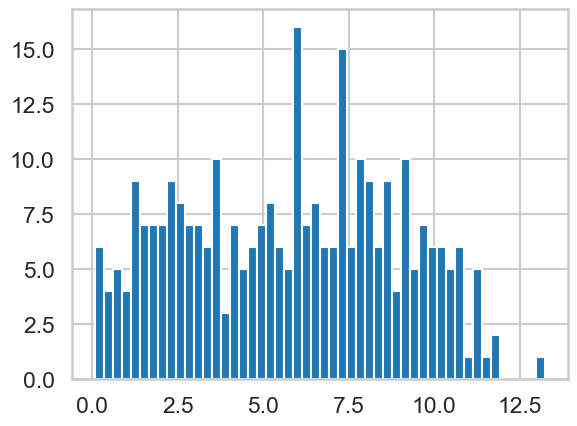

In [45]:
# calculate the difference between arrival and departure times
df['duration'] = df['departure'] - df['arrival']

# plot the duration distribution
plt.hist(df['duration'], bins=50)

In [46]:
#  save arrival and departure times to csv
df.to_csv("Data/arrival_departure_times.csv", index=False)